In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [31]:
female_data = pd.read_csv("inputs/ANSUR_II_FEMALE_Public.csv", encoding='latin1')
female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [32]:
male_data   = pd.read_csv("inputs/ANSUR_II_MALE_Public.csv", encoding='latin1')
male_data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [33]:
data = pd.concat([female_data, male_data], ignore_index=True)
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
6064,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
6065,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
6066,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


In [34]:
data["weightkg"] = data["weightkg"] / 10
data["weightkg"]

0       65.7
1       53.4
2       66.3
3       78.2
4       88.6
        ... 
6063    67.5
6064    89.6
6065    83.2
6066    73.1
6067    98.5
Name: weightkg, Length: 6068, dtype: float64

In [35]:
data["stature"] = data["stature"] / 10
data["stature"]

0       156.0
1       166.5
2       171.1
3       166.0
4       157.2
        ...  
6063    168.8
6064    176.5
6065    169.0
6066    171.8
6067    182.8
Name: stature, Length: 6068, dtype: float64

In [36]:
data["Gender"] = data["Gender"].replace(["Female", "Male"], [0, 1]).astype(int)
data["Gender"]

C:\Users\rayaneh.ins\AppData\Local\Temp\ipykernel_12268\958912389.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(["Female", "Male"], [0, 1]).astype(int)


0       0
1       0
2       0
3       0
4       0
       ..
6063    1
6064    1
6065    1
6066    1
6067    1
Name: Gender, Length: 6068, dtype: int64

In [37]:
data["biacromialbreadth"] = data["biacromialbreadth"] / 10
data["biacromialbreadth"]

0       37.3
1       37.2
2       39.7
3       38.4
4       37.8
        ... 
6063    38.4
6064    42.8
6065    40.7
6066    41.9
6067    44.2
Name: biacromialbreadth, Length: 6068, dtype: float64

In [38]:
data["shouldercircumference"] = data["shouldercircumference"] /10
data["shouldercircumference"]

0       106.2
1       101.4
2       104.9
3       112.1
4       115.1
        ...  
6063    109.6
6064    119.9
6065    118.1
6066    116.2
6067    123.1
Name: shouldercircumference, Length: 6068, dtype: float64

Text(0, 0.5, 'weight(kg)')

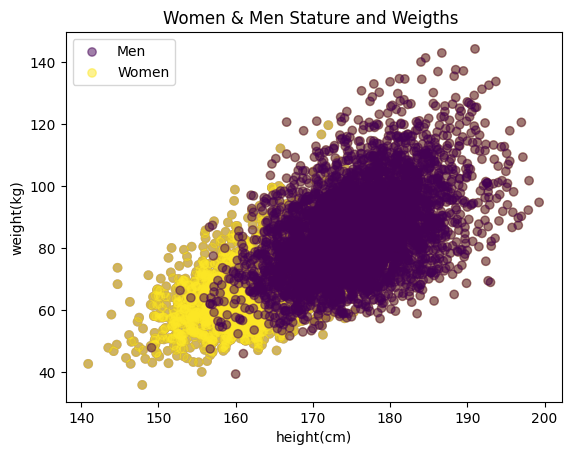

In [39]:
plt.scatter(data['stature'] , data['weightkg'] , c=data['Gender']==1 , marker= "o" , alpha= 0.5)
plt.scatter(data['stature'] , data['weightkg'] , c=data['Gender']==0 , marker= "o" , alpha= 0.5)

plt.legend(["Men","Women"])
plt.title("Women & Men Stature and Weigths ")
plt.xlabel("height(cm)")
plt.ylabel("weight(kg)")

Text(0, 0.5, 'persons count')

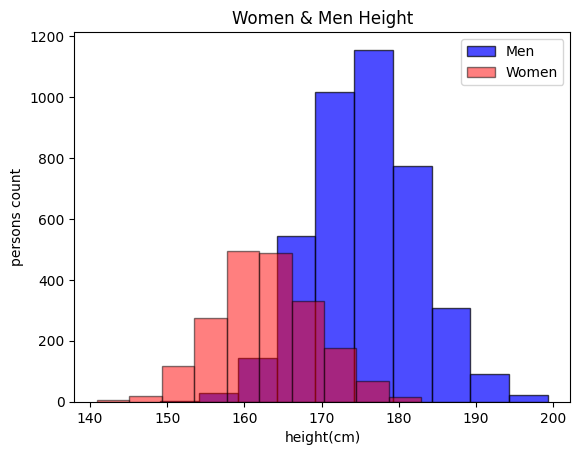

In [40]:
women_height = data.query("Gender == 0 ")["stature"]
men_height   = data.query("Gender == 1 ")["stature"]

plt.hist(men_height ,color= 'blue'  , edgecolor="black"  , alpha = 0.7)
plt.hist( women_height ,color="red" , edgecolor="black" , alpha = 0.5)
plt.title("Women & Men Height")
plt.legend(["Men" , "Women" ])
plt.xlabel("height(cm)")
plt.ylabel("persons count")

In [41]:
X = data[['stature' , 'weightkg' , "biacromialbreadth" , "shouldercircumference"]].reset_index()
X

,index,stature,weightkg,biacromialbreadth,shouldercircumference
0,0,156.0,65.7,37.3,106.2
1,1,166.5,53.4,37.2,101.4
2,2,171.1,66.3,39.7,104.9
3,3,166.0,78.2,38.4,112.1
4,4,157.2,88.6,37.8,115.1
...,...,...,...,...,...
6063,6063,168.8,67.5,38.4,109.6
6064,6064,176.5,89.6,42.8,119.9
6065,6065,169.0,83.2,40.7,118.1
6066,6066,171.8,73.1,41.9,116.2


In [42]:
Y = data['Gender'].reset_index()
Y

,index,Gender
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
6063,6063,1
6064,6064,1
6065,6065,1
6066,6066,1


In [43]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=3000)

In [44]:
X_train = X_train[["stature" , "weightkg" , "biacromialbreadth" , "shouldercircumference"]]
X_train

,stature,weightkg,biacromialbreadth,shouldercircumference
3349,181.1,110.8,43.5,130.5
4659,178.5,74.2,41.3,113.3
5927,178.0,81.1,41.7,110.0
4738,173.9,94.7,43.1,124.9
2973,182.1,104.8,42.3,123.6
...,...,...,...,...
1876,168.3,83.5,38.2,111.3
949,160.2,61.9,33.5,96.7
1966,158.0,74.0,34.5,101.4
3841,172.5,85.1,42.5,121.9


In [45]:
X_test  = X_test[["stature" , "weightkg" , "biacromialbreadth" , "shouldercircumference"]]
X_test

,stature,weightkg,biacromialbreadth,shouldercircumference
3336,174.5,80.4,41.4,116.8
5980,191.3,85.3,42.8,117.1
2419,176.3,81.9,43.6,119.4
803,166.7,68.0,37.4,105.9
3494,172.7,84.6,41.1,121.2
...,...,...,...,...
4054,176.1,73.4,39.3,109.5
4788,165.3,63.8,40.4,110.6
5079,170.7,72.8,41.2,112.6
3284,173.0,91.3,41.0,120.6


In [46]:
X_train  = X_train[["stature" , "weightkg" , "biacromialbreadth" , "shouldercircumference"]] 
X_train = np.array(X_train)
X_train

array([[181.1, 110.8,  43.5, 130.5],
       [178.5,  74.2,  41.3, 113.3],
       [178. ,  81.1,  41.7, 110. ],
       ...,
       [158. ,  74. ,  34.5, 101.4],
       [172.5,  85.1,  42.5, 121.9],
       [171.6,  78.5,  39.7, 107.9]])

In [47]:
X_test  = X_test[["stature" , "weightkg" , "biacromialbreadth" , "shouldercircumference"]] 
X_test = np.array(X_test)
X_test

array([[174.5,  80.4,  41.4, 116.8],
       [191.3,  85.3,  42.8, 117.1],
       [176.3,  81.9,  43.6, 119.4],
       ...,
       [170.7,  72.8,  41.2, 112.6],
       [173. ,  91.3,  41. , 120.6],
       [175.5,  76.7,  41.6, 118.7]])

In [48]:
Y_train = Y_train['Gender']
Y_train = np.array(Y_train)
Y_train

array([1, 1, 1, ..., 0, 1, 0])

In [49]:
Y_test = Y_test["Gender"]
Y_test = np.array(Y_test)
Y_test

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
from knn import KNN

knn = KNN(3)
knn.fit(X_train , Y_train)

In [51]:
person1 = np.array([160.3,  64.9 , 40, 110])
person2 = np.array([170.2 , 85.1 ,36 , 125])
person3 = np.array([150.3  , 45.9 , 30 , 103])
person4 = np.array([180.4 , 90.5 , 44 , 120])
person5 = np.array([170 , 70 , 42 , 118])

listof_new_persons  = [person1 , person2 , person3 , person4 , person5]
outputs = knn.predict(listof_new_persons)
outputs

[np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]

In [52]:
for output in outputs:
    if output == 0:
        print('👩🏻')
    else:
        print('👨🏻')

👨🏻
👨🏻
👩🏻
👨🏻
👨🏻


In [53]:
knn.evaluate(X_test , Y_test)

np.float64(0.9505766062602965)

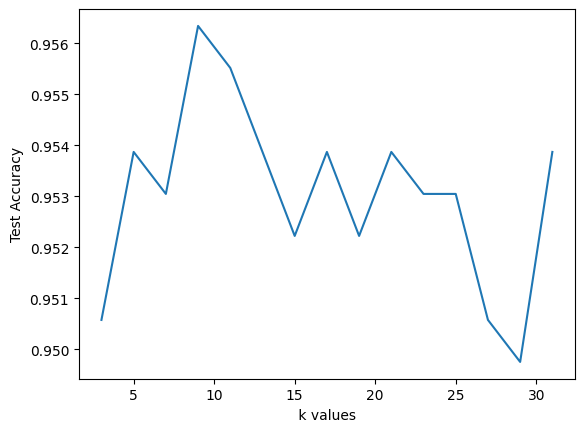

In [54]:
k = 3
test_acc_list = []
k_list = []

for i in range(15) :

    k_list.append(k)
    knn = KNN(k)
    knn.fit(X_train , Y_train)
    acc = knn.evaluate(X_test , Y_test)
    k+=2
    
    test_acc_list.append(acc)

plt.plot( k_list , test_acc_list )
plt.xlabel(" k values ")
plt.ylabel("Test Accuracy")
plt.show()

In [55]:
Y_prediction = knn.predict(X_test)
print(len(Y_prediction))

1214


In [56]:
confusion_matrix = np.zeros((2,2))

for i in range(1214) : 
    if Y_test[i] == 0 and Y_prediction[i] == 0 :   
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_prediction[i] == 1 :    
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_prediction[i] == 0  :    
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_prediction[i] == 1 :     
        confusion_matrix[1][1] += 1

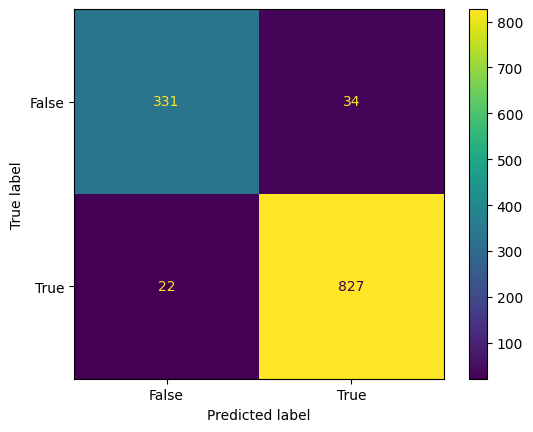

In [57]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()